In [1]:
pip install koreanize-matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 63.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

In [3]:
place = pd.read_excel('jeju_place.xlsx')
place.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037


In [4]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   순위        500 non-null    int64 
 1   관광지명      500 non-null    object
 2   광역시/도     500 non-null    object
 3   시/군/구     500 non-null    object
 4   도로명주소     500 non-null    object
 5   중분류 카테고리  500 non-null    object
 6   소분류 카테고리  500 non-null    object
 7   검색건수      500 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
place = place.set_index('순위')

In [6]:
place = place.drop('광역시/도', axis=1)
place

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
1,제주국제공항,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,803524
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
...,...,...,...,...,...,...
495,퍼시픽마리나,서귀포시,제주 서귀포시 중문관광로 154-17,레저스포츠,수상레저스포츠,1913
497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908
498,선운정사,제주시,제주 제주시 구몰동길 65-0,역사관광,종교성지,1902


In [7]:
place['중분류 카테고리'].unique()

array(['기타관광', '쇼핑', '자연관광', '문화관광', '레저스포츠', '체험관광', '역사관광'],
      dtype=object)

In [8]:
place.isnull().sum()

관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [9]:
mid_cat = place['중분류 카테고리'].value_counts()

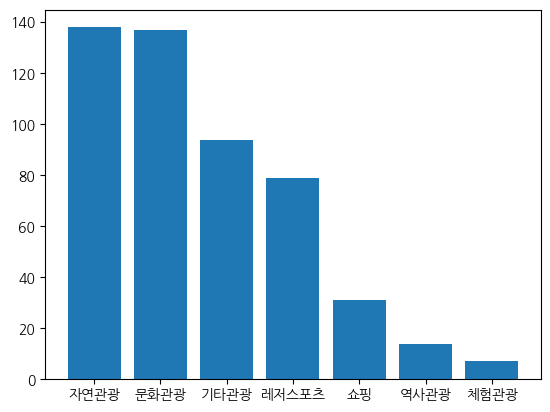

In [10]:
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [12]:
low_cat = place['소분류 카테고리'].value_counts()

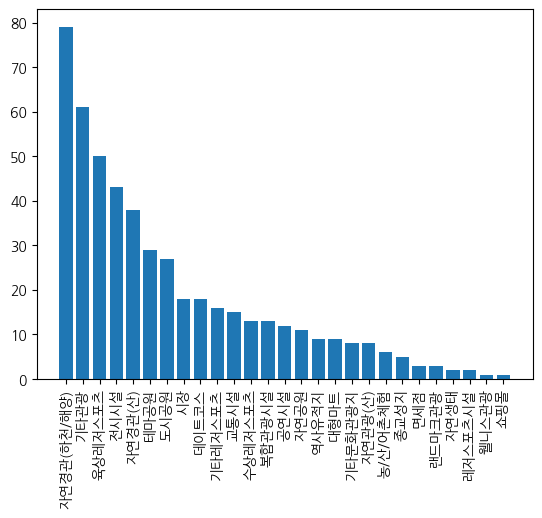

In [13]:
plt.bar(low_cat.index, low_cat)
plt.xticks(rotation=90)
plt.show()

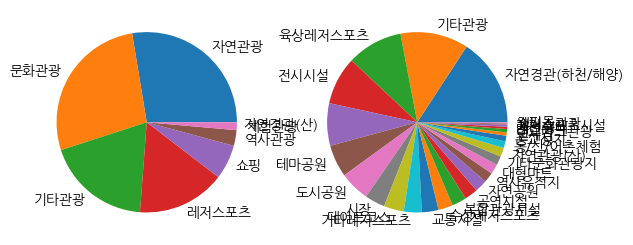

In [14]:
# pie chart: 전체에서 부분이 어느정도 차지하고 있느냐

# 중분류
plt.subplot(1, 2, 1)
plt.pie(mid_cat, labels=mid_cat.index)

# 소분류
plt.subplot(1, 2, 2)
plt.pie(low_cat, labels=low_cat.index)
plt.show()

In [15]:
# place 데이터프레임에서 소분류 상위 10개 값
top_low = place['소분류 카테고리'].value_counts().head(10)

In [ ]:
place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:10].index)] # 윤나요님 코드
# top_low 값들 기준 -> 원래 데이터에서 해당하는 소분류 카테고리를 뽑아오기

In [16]:
place[place['소분류 카테고리'].isin(place['소분류 카테고리'].value_counts()[:10].index)]

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...
491,새미은총의동산,제주시,제주 제주시,문화관광,도시공원,1936
492,금능해안도로,제주시,제주 제주시,기타관광,데이트코스,1923
495,조천만세동산,제주시,제주 제주시,문화관광,도시공원,1913


In [17]:
nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
순위,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...
455,하효항,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
474,구두미포구,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
483,제주항,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997


In [18]:
nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis = 0)

In [19]:
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '포구'].index, axis = 0)
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '부두'].index, axis = 0)
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:] == '염전'].index, axis = 0)
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '저수지'].index, axis = 0)
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:] == '방파제'].index, axis = 0)

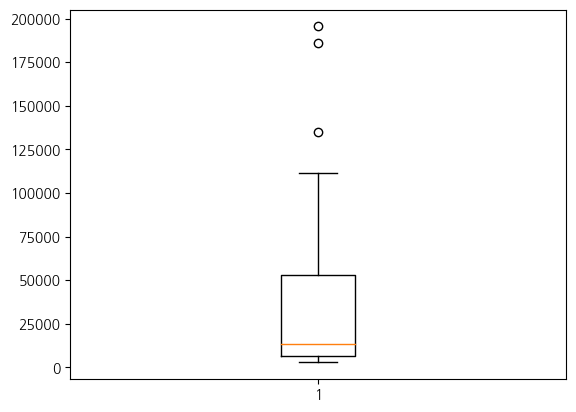

In [20]:
plt.boxplot(nature['검색건수'])
plt.show()

In [21]:
IQR = 53093 - 6737
upper_IQR = (IQR * 1.5) + 53093
upper_IQR

122627.0

In [22]:
import numpy as np


In [23]:
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡','보통')
nature

,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
순위,,,,,,,
4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통


In [25]:
j = nature[nature['시/군/구'] == '제주시']


In [26]:
groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0ef4635120>,
 [Text(0.8442058849930477, 0.7052066532181225, '서귀포시'),
  Text(-0.8442058849930479, -0.7052066532181224, '제주시')])

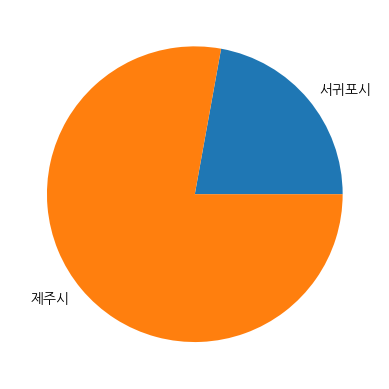

In [28]:
plt.pie(groupby_city,labels=groupby_city.index)

In [29]:
region = pd.read_csv('region.csv')
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [30]:
region = region.set_index('day')

In [31]:
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [32]:
region.index = pd.to_datetime(region.index, format = '%Y-%m-%d')

In [34]:
cities = region.loc[:, region.columns[:-1]]

region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [35]:
total = region.loc[:, '총확진자수']
total.head()

day
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
Name: 총확진자수, dtype: int64

<BarContainer object of 32 artists>

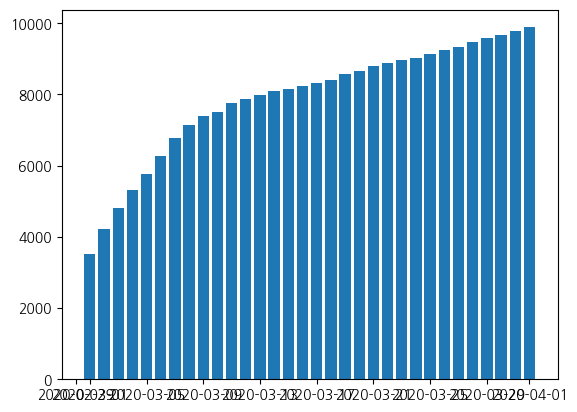

In [36]:
plt.bar(total.index, total)

In [37]:
plt.show()

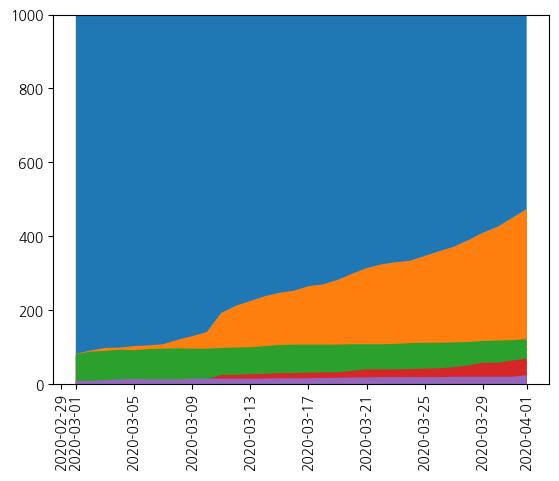

'\n축 범위: 최소값, 최대값\n'

In [38]:
# 시간 흐름에 따른 확진자 수 누적 그래프
# plt.stackplot(x, y1, y2, y3 , ... , labels=)
y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']
labels = ['서울', '대구', '부산', '인천', '광주']
colors = ['red', 'black']

# 누적 그래프 -> 어떤 게 누적될 것인지 -> 시간 순에 따라 정렬
# 쌓이는 방향, 시간순에 따라 쌓이는 부분 -> 각 지역별 데이터마다 누적 확인
plt.xticks(rotation=90)
plt.stackplot(cities.index, y2)
plt.stackplot(cities.index, y1)
plt.stackplot(cities.index, y3)
plt.stackplot(cities.index, y4)
plt.stackplot(cities.index, y5)

# 그래프 범위 설정
# plt.xlim([])
plt.ylim([0, 1000])
# plt.axis([x최소, x최대, y최소, y최대])

# plt.legend(loc='upper left')
plt.show()

'''
축 범위: 최소값, 최대값
'''

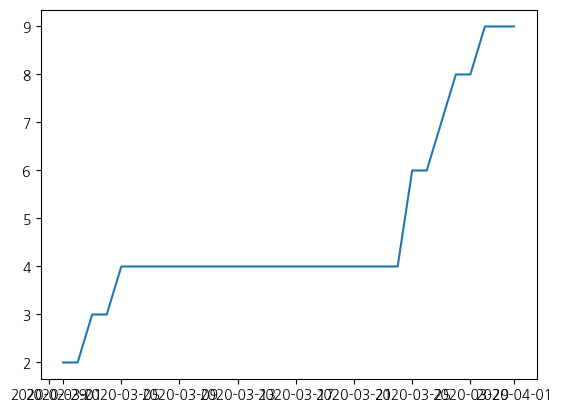

In [39]:
jeju = region['제주']
plt.plot(jeju)

In [40]:
import matplotlib.dates as mdates

In [41]:
# 코로나 지역별 데이터
# 지역명 -> 실제 좌표의 위치
# 좌표 데이터 -> 시청, 도청 -> 위도, 경도
loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

dict

In [42]:
# 위도: latitude, 경도: longitude
loc = pd.DataFrame(loc).T
loc.columns = ['lat','lon']
loc


,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [43]:
# 지도 관련 라이브러리
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import folium

In [45]:
map_osm = folium.Map(location=[33.361701, 126.511657], zoom_start=7)
map_osm

In [46]:
from folium.plugins import MarkerCluster

marker_cluster = MarkerCluster().add_to(map_osm)

folium.Marker(jeju, popup=jeju, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osm

ValueError: ignored

In [47]:
# 각 지역별로 마커찍기 -> 자습시간
# 지역별 확진자 합(데이터프레임)
# folium.Marker([위도, 경도], popup=지역의 확진자 합, icon=folium.Icon(color='red', icon='start)).add_to(marker_cluster)
# for문 순회

In [49]:
kr = pd.read_csv('/content/total_.csv')
kr.head()

,date,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
0,2020-03-01,96985,3526,30,3479,17,32422,61037
1,2020-03-02,109591,4212,31,4159,22,33799,71580
2,2020-03-03,125851,4812,34,4750,28,35555,85484
3,2020-03-04,136707,5328,41,5255,32,28414,102965
4,2020-03-05,146541,5766,88,5643,35,21810,118965


In [50]:
kr = kr.set_index('date')

In [51]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')

In [52]:
# 데이터 타입들 중 컬럼들이 서로 상관성이 있거나 반대 성향(경향)이 있으면 서로 비교 -> 상관관계 , 상관계수
pos = kr['확진자']
neg = kr['결과 음성']

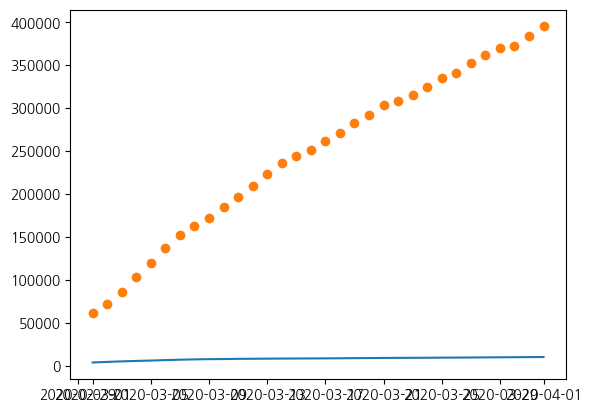

In [53]:
plt.plot(pos)
plt.plot(neg, 'o')

plt.show()

In [54]:
sum_p = pos.sum()
sum_p
sum_n = neg.sum()
sum_n

7873877

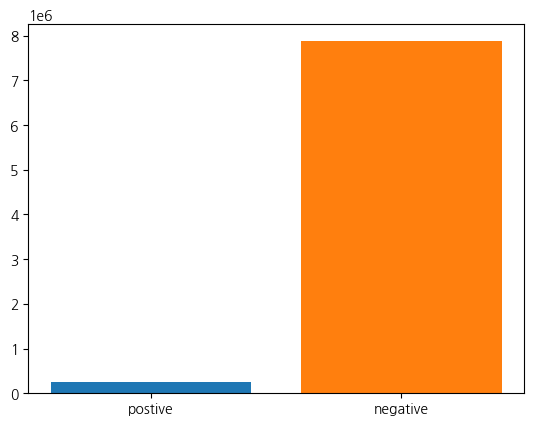

In [55]:
# 몇 명 -> 합
plt.bar('postive', sum_p)
plt.bar('negative', sum_n)
plt.show() # 비교되는 두 가지는 딱 두 가지가 시각적으로 들어오게

NameError: ignored

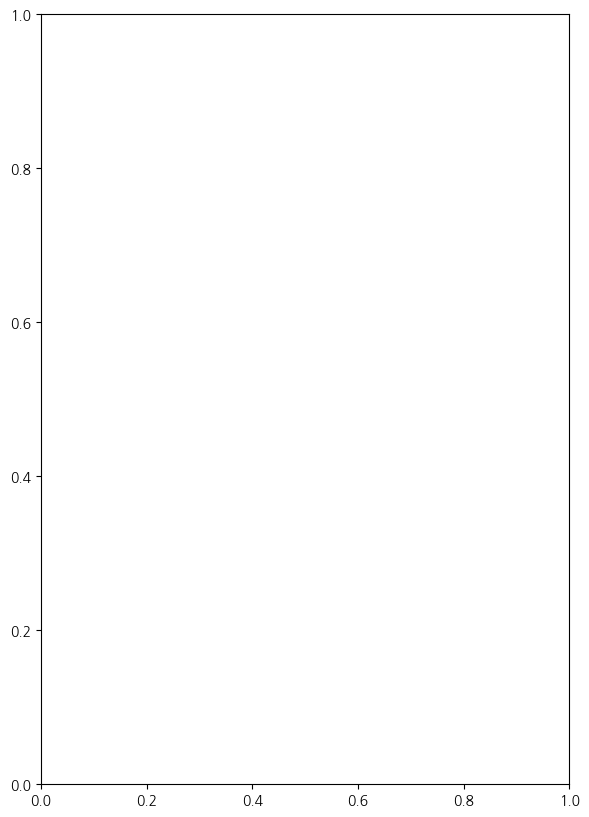

In [56]:

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.plot(d_p, 'or')

plt.subplot(1, 2, 2)
plt.bar(death.index, death)

plt.show()
# 내가 새롭게 만든 데이터가 같은 경향 -> 제대로 변환을 했다

NameError: ignored

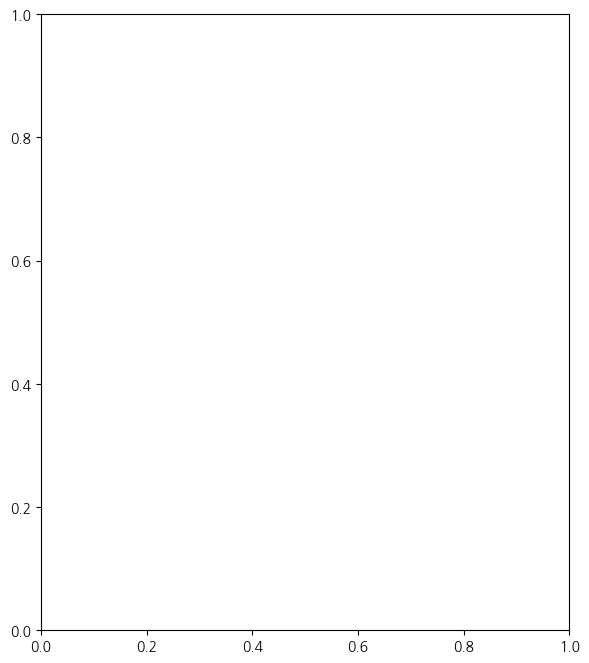

In [57]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.bar(death.index, death)
# d_p

plt.subplot(1, 2, 2)
plt.bar(rec.index, rec)
# r_p
plt.show()